In [108]:
import os, pandas, numpy, time, datetime
import matplotlib.pyplot as plt

SD = pandas.read_excel('Sensor Data.xlsx')
MD = pandas.read_excel('Meteorological Data.xlsx')

In [109]:
#return a set of the chemicals
def getChemicals(SD):
    return list(set(pandas.Series(SD['Chemical']).values))

#return a set of the sensors
def getSensors(SD):
    return list(set(pandas.Series(SD['Monitor']).values))


In [110]:
#error where Reading = 31
selected = pandas.Series(SD.loc[(SD['Monitor'] == 1) & (SD['Chemical'] == 'Methylosmolene') & (SD['Reading'] < 25)]['Reading']).values
selectedAfter = [i - numpy.mean(selected) for i in selected]

In [111]:
#https://matplotlib.org/examples/pylab_examples/subplots_demo.html -> goeie uitleg subplots

In [112]:
chemicals = getChemicals(SD)
sensors = getSensors(SD)

In [113]:
'''for i in range(1,len(sensors)+1):
    data = pandas.Series(SD.loc[(SD['Monitor'] == i) & (SD['Chemical'] == 'Methylosmolene') & (SD['Reading'] < 25)]['Reading']).values
    plt.subplot(int('91%i'%i))
    plt.plot(range(len(data)),data)'''

"for i in range(1,len(sensors)+1):\n    data = pandas.Series(SD.loc[(SD['Monitor'] == i) & (SD['Chemical'] == 'Methylosmolene') & (SD['Reading'] < 25)]['Reading']).values\n    plt.subplot(int('91%i'%i))\n    plt.plot(range(len(data)),data)"

In [128]:
timecodesOld = MD['Date'].values

def getTimestamp(timecode):
    timecode = pandas.to_datetime(str(timecode)).strftime("%Y.%m.%d.%H")
    timecode = datetime.datetime(int(timecode[0:4]),int(timecode[5:7]),int(timecode[8:10]),int(timecode[11:13]))
    timecode = str(int(time.mktime(timecode.timetuple())))
    return timecode

MD['timestamps'] = [getTimestamp(timecode) for timecode in MD['Date'].values]
SD['timestamps'] = [getTimestamp(timecode) for timecode in SD['Date Time'].values]

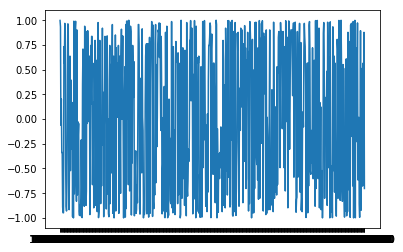

In [136]:
def plotWindDirectionAgainstTime(MD):
    WD = pandas.Series(MD.loc[(MD['Wind Direction'] > 0)]['Wind Direction']).values
    TS = pandas.Series(MD.loc[(MD['Wind Direction'] > 0)]['timestamps']).values
    WD = [numpy.sin(int(wd)) for wd in WD]
    #WD = [numpy.sin((int(ts)*numpy.pi)/180) for ts in WD]
    plt.plot(TS,WD)
    plt.savefig('WD-TS.jpg')
    
plotWindDirectionAgainstTime(MD)

In [157]:
def plotWDonDay(MD,day):
    TS = datetime.datetime.strptime('2016-05-23','%Y-%m-%d')
    print(TS)
    
plotWDonDay(MD,'')

2016-05-23 00:00:00
